# 聚类总结
## 目录
1. 综述
2. 聚类步骤总结
3. 聚类效果评估
4. 层次聚类（Hierarchical Clustering）



# Part1. 聚类方法综述
主要基于sklearn的官方文档，链接：https://scikit-learn.org/stable/modules/clustering.html#clustering

发现一个好东西：https://github.com/xiaoyusmd/PythonDataScience

总体来看一下各种聚类方法的效果：

<img src=".\datasets\sphx_glr_plot_cluster_comparison_001.png" alt="Cat" width="1000" height="800">

所有的方法都能接受形状为（`n_samples`, `n_features`）的标准数据矩阵，然后训练数据的标签可以在`labels_`属性中找到

根据之前的经验，从图中可以看出，DBSCAN识别连续形状的能力很强，K均值的适用性很强；在条带的识别上，HDBSCAN可以代替DBSCAN，谱聚类的效果也更好，但是谱聚类只适用于中等样本和小聚类，HDBSCAN可以适配大样本，中等聚类

具体还得看实际情况和下面的表格：

## 官方表格机翻

| **方法名称**                | **参数**                                 | **可扩展性**                                           | **用途**                                        | **几何特性（使用的度量）**               |
|-------------------------|---------------------------------------|-----------------------------------------------|--------------------------------------------|------------------------------------|
| K-Means                 | 聚类数                                   | 非常大的 n_samples，中等 n_clusters | 通用型，即使聚类大小，平坦几何，不太多的聚类，归纳 | 点之间的距离                        |
| Affinity propagation    | 阻尼，样本偏好                              | 不适用于较大的 n_samples                           | 多个聚类，不均匀聚类大小，非平坦几何，归纳        | 图距离（例如最近邻图）                      |
| Mean-shift              | 带宽                                     | 不适用于较大的 n_samples                           | 多个聚类，不均匀聚类大小，非平坦几何，归纳        | 点之间的距离                        |
| Spectral clustering     | 聚类数                                   | 中等 n_samples，小型 n_clusters                 | 少量聚类，均匀聚类大小，非平坦几何，转导          | 图距离（例如最近邻图）                      |
| Ward hierarchical clustering | 聚类数或距离阈值                            | 大型 n_samples 和 n_clusters                     | 多个聚类，可能存在连接约束，转导                | 点之间的距离                        |
| Agglomerative clustering | 聚类数或距离阈值、链接类型、距离                    | 大型 n_samples 和 n_clusters                     | 多个聚类，可能存在连接约束，非欧几里得距离，转导      | 任意两点之间的距离                     |
| DBSCAN                  | 邻域大小                                   | 非常大的 n_samples，中等 n_clusters                | 非平坦几何，不均匀聚类大小，异常值去除，转导       | 最近点之间的距离                      |
| HDBSCAN                 | 最小聚类成员数、最小点邻居数                      | 大型 n_samples，中等 n_clusters                   | 非平坦几何，不均匀聚类大小，异常值去除，转导，层次化，变量聚类密度 | 最近点之间的距离                      |
| OPTICS                  | 最小聚类成员数                              | 非常大的 n_samples，大型 n_clusters                | 非平坦几何，不均匀聚类大小，变量聚类密度，异常值去除，转导 | 点之间的距离                        |
| 高斯混合模型                         | 许多                                     | 不可扩展                                            | 平坦几何，适用于密度估计，归纳                  | 到中心的马氏距离                      |
| BIRCH                   | 分支因子、阈值、可选全局聚类器                      | 大型 n_clusters 和 n_samples                     | 大型数据集，异常值去除，数据降维，归纳             | 点之间的欧氏距离                      |
| Bisecting K-Means       | 聚类数                                   | 非常大的 n_samples，中等 n_clusters                | 通用型，即使聚类大小，平坦几何，没有空聚类，归纳，层次化 | 点之间的距离                        |


# Part2.聚类步骤总结

## ①数据预处理
这一步可能要做的事：
- 导库
- 观察数据集
- 主成分分析（比如对高维数据集使用K-means）
- 因子分析
- 数据集降维
- 归一化/标准化（对于z-score标准化要做正态性检验）

## ②选择合适的聚类方式
根据样本数量，样本特征数，适当作图，然后选择一个合适的聚类方法

## ③选择最佳的聚类参数
以K-means为例，参数是n_clusters（簇数），需要使用肘部法则或者轮廓系数来确定最佳参数

## ④聚类
一般不用手写的聚类代码，直接用sklearn的库即可，很方便，保存labels

## ⑤聚类效果评估
见Part3

# Part3.聚类效果评估

## 方法一、轮廓系数法Silhouette Coefficient
常见于**K-means**（见kmeans系列笔记）

其取值从-1（垃圾聚类）到1（好聚类），另外，0代表聚类重叠，也就是没有很好地划分出来；当簇密集且分离良好时，分数较高，这与簇的标准概念相关。

**缺点**：凸簇的轮廓系数通常高于其他概念的簇，例如通过 DBSCAN 获得的基于密度的簇

### 计算方式
对于其中一个样本点，我们令：
- a：该样本与同一类中所有其他点之间的平均距离
- b：该样本与下一个最近簇中所有其他点之间的平均距离

单个样本的轮廓系数s的计算公式：
$$
s= \frac{b-a}{max(a,b)}
$$

### Demo
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.561464362648773
For n_clusters = 6 The average silhouette_score is : 0.4857596147013469


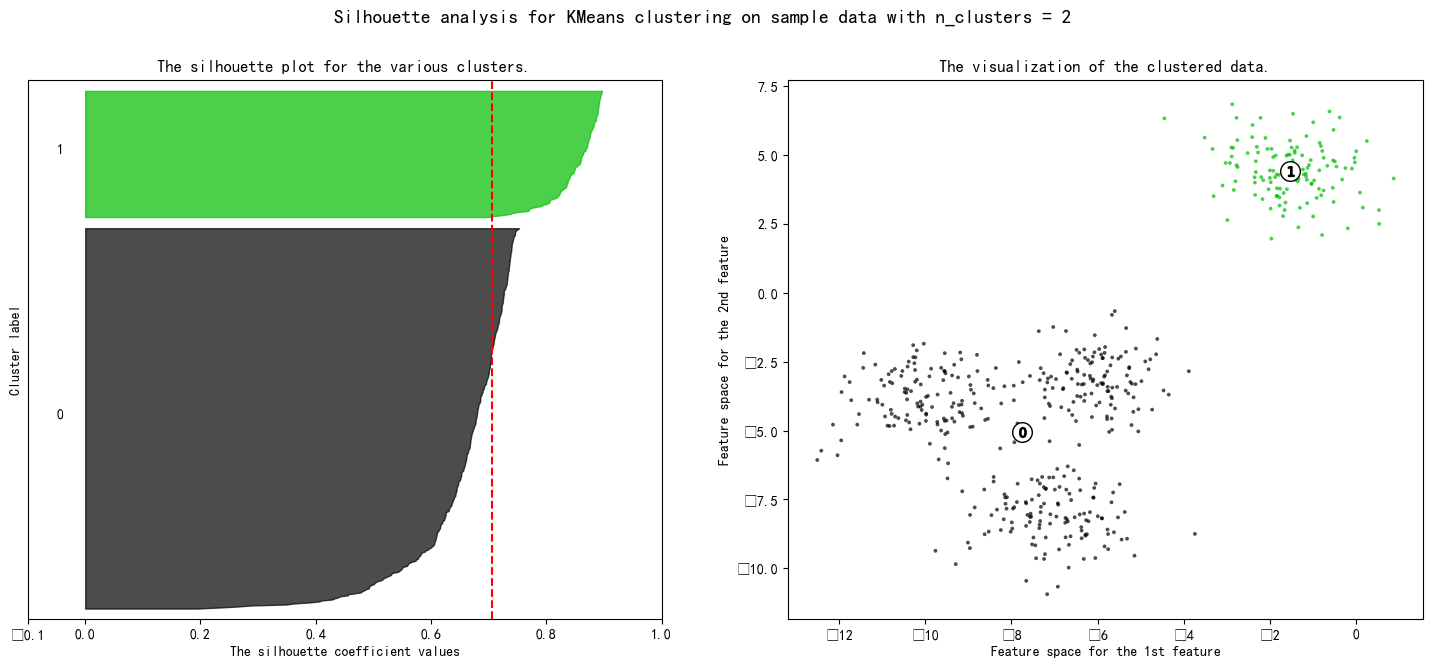

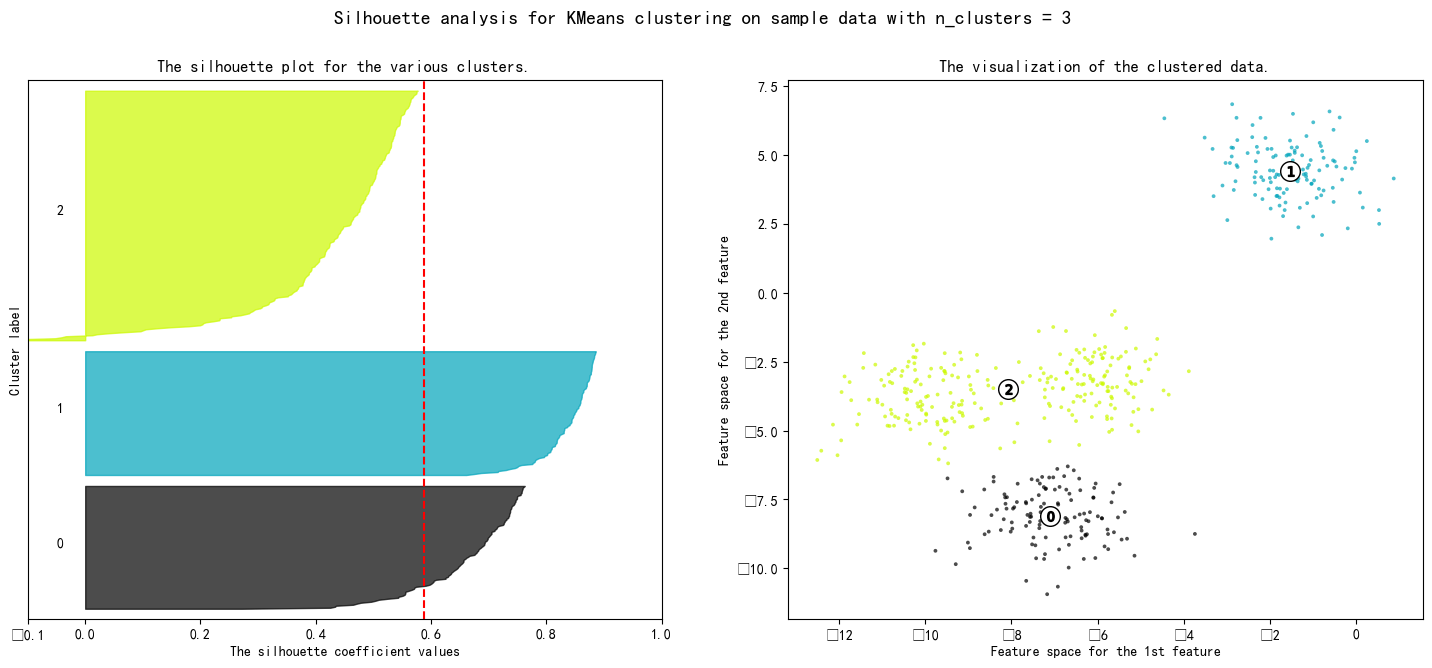

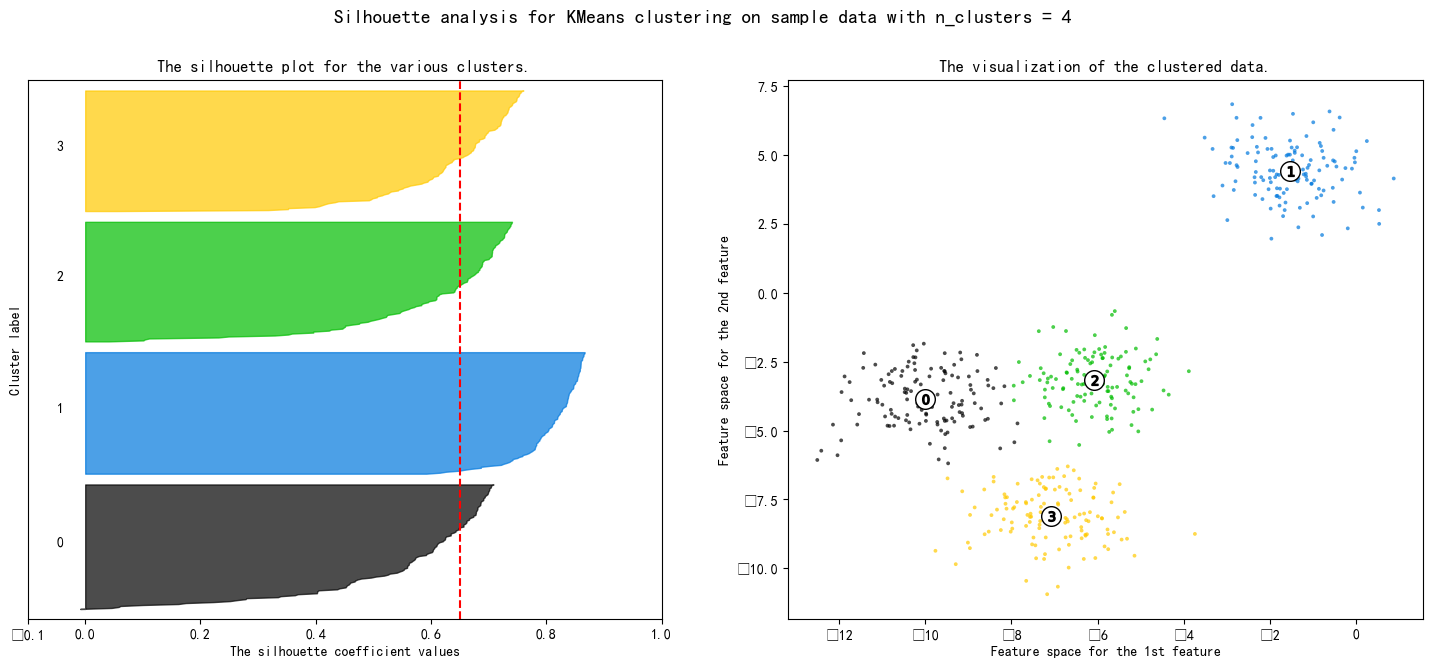

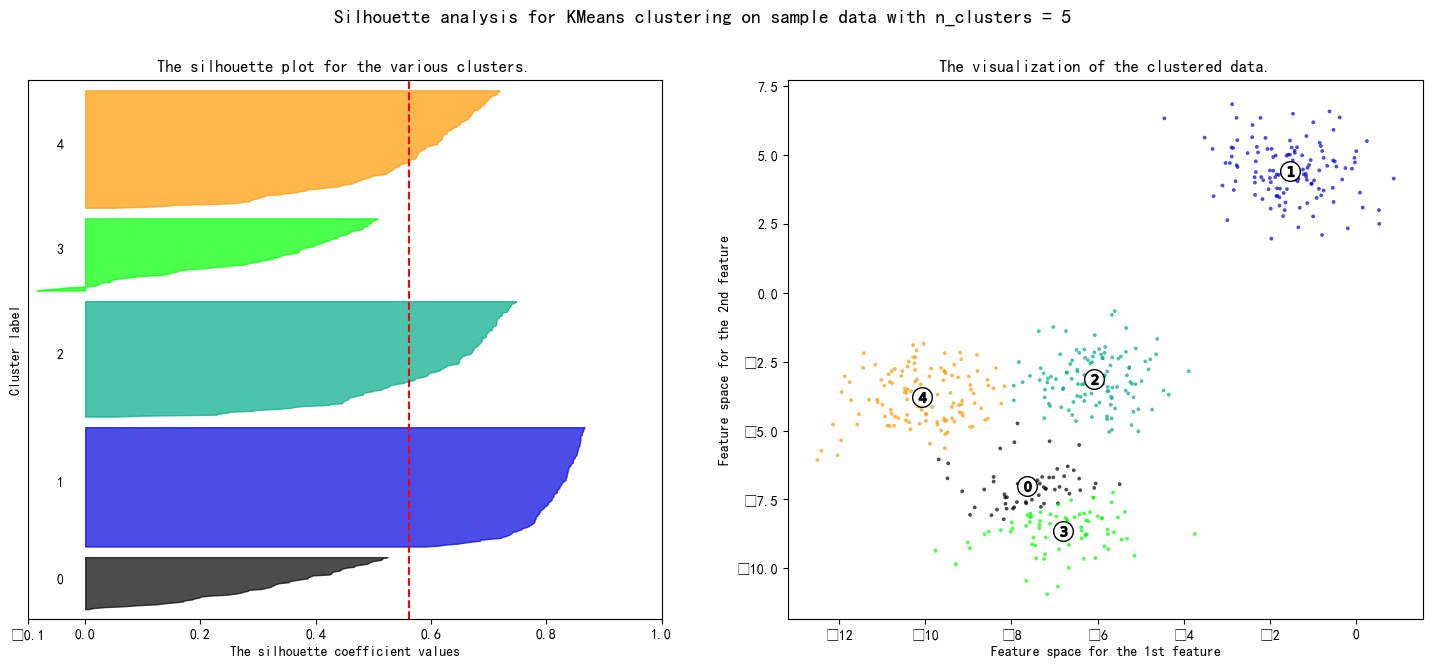

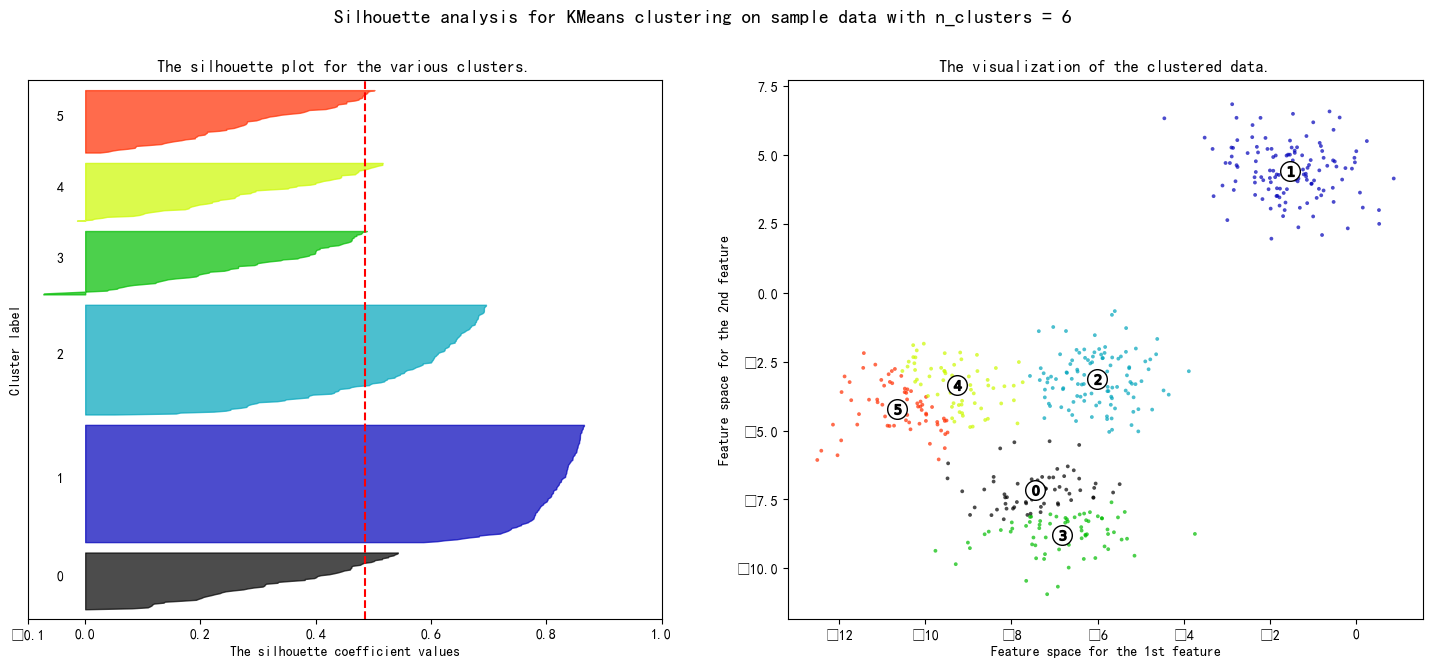

In [47]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# 通过make_blobs产生数据集
# 该种子下的数据中，一个簇独立，另外三个簇很接近
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
) 

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # 生成两个子图
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 第一个图是轮廓系数图
    # 轮廓系数的取值范围是-1到1，但本例中的轮廓系数范围在[-0.1，1]中
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 是用来在y轴上插入空白，给不同聚类之间隔开，让图更加清晰
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # 初始化Kmeans模型
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # 给出所有样本的平均轮廓系数，可以看出不同簇之间的分离程度
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # 计算每个样本的轮廓系数
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # 把不同类的每个样本的轮廓系数综合起来进行排序
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # 标记每个簇的编号
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # 计算下一个簇的起始点
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # 垂直线代表所有样本的平均轮廓系数
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 第二个图展示了实际点的分布
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # 标记不同的簇
    centers = clusterer.cluster_centers_
    # 在簇中心处绘制白色圆圈的中心点
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

通过上图可以看出，n_clusters为3、5、6时，聚类效果很拉跨，因为存在轮廓得分低于平均水平的簇，而且轮廓图大小波动很大，从图中也能直观感受出不同的簇的大小，可以看到2和4都可以用来选择，他们的区别是，4聚类把左下角的一团数据分成了差不多的三类，而2聚类则把他们放到了一起

## 方法2.DB指数法（Davies-Bouldin Index）
该指数计算每个群体与其他群体之间的距离和群体内部的平均距离，以确定群体之间的分离度和群体内部紧密度之间的平衡，DB指数越小，表示聚类质量越高。0是最低的分数，DB指数越接近0越好

### 优点
- Davies-Bouldin 的计算比 Silhouette 分数的计算简单。
- 该索引仅基于数据集固有的数量和特征，因为其计算仅使用逐点距离。

### 缺点
- 凸簇的 Davies-Boulding 指数通常高于其他概念的簇，例如从 DBSCAN 获得的基于密度的簇。

质心距离的使用将距离度量限制在欧几里德空间。

### 计算方法
具体见https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

2.3.11.7 

这里给个截图
<img src=".\datasets\Clustering1.png" alt="Cat" width="1000" height="800">

In [49]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans.labels_
davies_bouldin_score(X, labels)

### 使用方法很简单，直接用davies_bouldin_score即可
# 把数据矩阵作为第一个参数，标签作为第二个参数即可

0.6619715465007484

## 方法3.CH指数（Calinski-Harabasz Index）

In [50]:
### 一般用法
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
X, y = datasets.load_iris(return_X_y=True)

import numpy as np
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.calinski_harabasz_score(X, labels)

561.62775662962

### 优点
- 当簇密集且分离良好时，分数较高，这与簇的标准概念相关
- 分数的计算速度很快

### 缺点
- 凸簇的 Calinski-Harabasz 指数通常高于其他概念的簇（例如通过 DBSCAN 获得的基于密度的簇）

计算公式见官方文档2.3.11.6

## 方法4.误差平方和
见Kmeans部分笔记

# Part4.补充：Hierarchical Clustering（层次聚类）
参考知乎链接，这篇讲的挺好的：https://zhuanlan.zhihu.com/p/435987610

层次聚类有两种：
- **凝聚层次聚类**：即分别让所有点单独成一个簇，然后通过相似性不断组合，直到只有最后一个簇为止
- **分裂层次聚类**：正好反过来，从单个集群开始分裂，直到无法分裂，每个点都是一个簇

<img src=".\datasets\Hierarchical1.png" alt="Cat" width="300" height="200">

上图就是根据凝聚层次聚类过程绘制出的树状图，注意，每一条垂直于x轴的线段的长度代表**两点之间的距离**，当多个点合并成一簇后，新簇的计算使用他们的质心

<img src=".\datasets\Hierarchical2.png" alt="Cat" width="300" height="200">

现在我们可以设置一个阈值距离，绘制一条水平线，比如将阈值设置为12，绘制一条水平线。那么这条阈值水平线与垂线的交点数量就是聚类的数量，如上图，可以分成两个聚类

## Demo
以鸢尾花数据集为例

In [1]:
import os
for dirname, _, filenames in os.walk('.\datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# 任何在这个工程文件夹的datasets子文件夹中的文件将被输出

print('-'*50)

#忽略警告
import warnings
warnings.filterwarnings('ignore')

.\datasets\data.xlsx
.\datasets\Hierarchical1.jpg
.\datasets\iris.csv
.\datasets\Live.csv
.\datasets\Mall_Customers.csv
.\datasets\sphx_glr_plot_cluster_comparison_001.png
.\datasets\users.xlsx
.\datasets\users_2.xlsx
--------------------------------------------------


In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

import matplotlib.pyplot as plt

# 读取数据
a = pd.read_csv(".\datasets\iris.csv")
b = a.iloc[:, :-1]

b.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
data_scaled = normalize(b)
data_scaled = pd.DataFrame(data_scaled, columns=b.columns)
data_scaled.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639


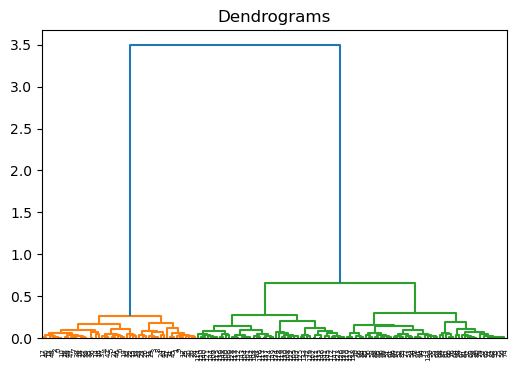

In [9]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(6, 4))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

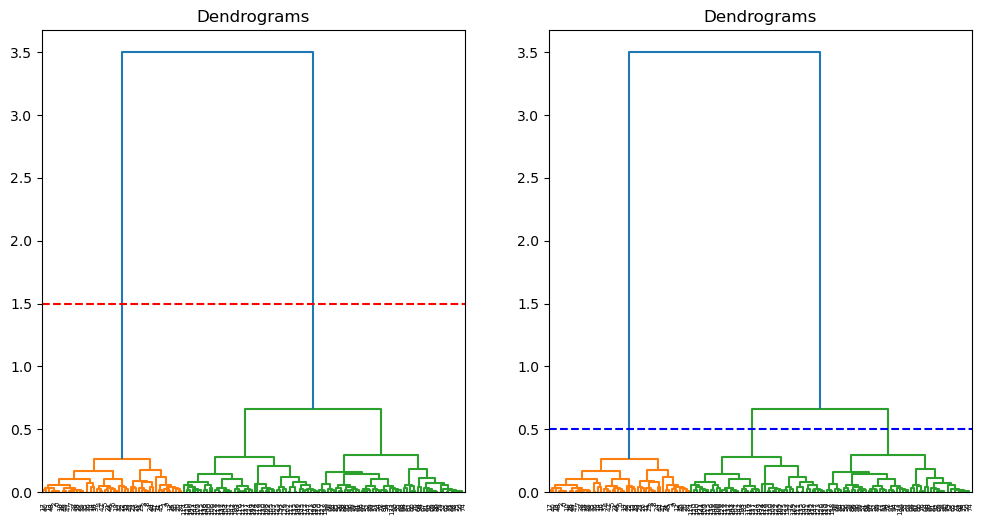

In [12]:
### 分别按阈值1.5和0.5进行分割

plt.figure(figsize=(12, 6))  
plt.subplot(121)
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1.5, color='r', linestyle='--')

plt.subplot(122)
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=0.5, color='b', linestyle='--')


## AgglomerativeClustering

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

In [42]:
### 进行聚类

from sklearn.cluster import AgglomerativeClustering

data_scaled_2 = data_scaled.copy()
data_scaled_3 = data_scaled.copy()

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled_2)
data_scaled_2['label']=cluster.labels_

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled_3)
data_scaled_3['label']=cluster.labels_

print(data_scaled_2.columns)

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'label'], dtype='object')


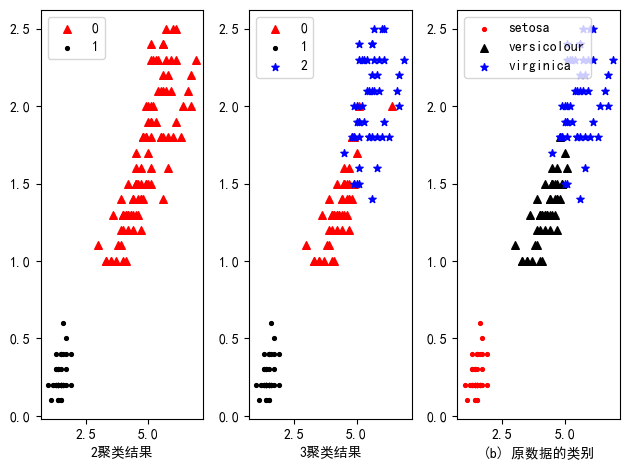

In [46]:
# 配置中文字体
plt.rcParams['font.family'] = 'SimHei'

# 设置子图1
plt.subplot(131)
colors = ['red', 'black']
markers = ['^', '.']
label_2 = data_scaled_2['label']
for i in range(len(data_scaled_2['label'].unique())):
    plt.scatter(b['Petal_Length'][label_2==i], b['Petal_Width'][label_2==i], 
                c=colors[i], marker=markers[i], s=30, label=str(i))
plt.legend()
plt.xlabel("2聚类结果")

# 设置子图2
plt.subplot(132)
colors = ['red', 'black', 'blue']
markers = ['^', '.', '*']
label_3 = data_scaled_3['label']
for i in range(len(data_scaled_3['label'].unique())):
    plt.scatter(b['Petal_Length'][label_3==i], b['Petal_Width'][label_3==i], 
                c=colors[i], marker=markers[i], s=30, label=str(i))
plt.legend()
plt.xlabel("3聚类结果")

# 设置子图3
plt.subplot(133)
markers = ['.', '^', '*']
str2 = [u'setosa', u'versicolour', u'virginica']
ind = np.hstack([np.zeros(50), np.ones(50), 2*np.ones(50)])
for i in range(3):
    plt.scatter(b['Petal_Length'][ind==i], b['Petal_Width'][ind==i], 
                c=colors[i], marker=markers[i], s=30, label=str2[i])
plt.legend(loc='upper left')
plt.xlabel("(b) 原数据的类别")

# 调整图的布局和间距
plt.tight_layout()

# 显示图
plt.show()

可以看出聚类结果还可以，有少许偏差